# [Dacon - 풍속 예측 AI 경진대회](https://dacon.io/competitions/official/236126/overview/description)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [3]:
df = pd.read_csv(os.getcwd() + '/data/wind/train.csv')
display(df.head())
print(df.info())
print(df.shape)

,ID,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
0,TRAIN_00000,7,2,저녁,13.97,287.78,9.84,76.1,992.08,15.98,12.16,3.82,7.66,1198.06,155.60,1.61
1,TRAIN_00001,8,21,오전,16.94,290.85,12.14,73.3,991.07,19.33,14.17,5.16,8.94,1183.67,177.00,1.68
2,TRAIN_00002,11,1,저녁,9.76,283.84,5.40,74.2,988.71,12.10,8.98,3.12,5.67,1213.22,146.20,0.73
3,TRAIN_00003,12,28,오전,5.27,277.30,2.71,83.5,1014.25,8.89,7.43,1.47,4.57,1265.48,264.50,2.71
4,TRAIN_00004,9,26,오후,17.35,290.86,12.68,74.0,995.77,19.84,14.68,5.16,9.22,1187.40,19.34,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36581 entries, 0 to 36580
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36581 non-null  object 
 1   월               36581 non-null  int64  
 2   일               36581 non-null  int64  
 3   측정 시간대          36581 non-null  object 
 4   섭씨 온도(°⁣C)      36581 non-null  float64
 5   절대 온도(K)        36581 non-null  float64
 6   이슬점 온도(°C)      36581 non-null  float64
 7   상대 습도 (%)       36581 non-null  float64
 8   대기압(mbar)       36581 non-null  float64
 9   포화 증기압(mbar)    36581 non-null  float64
 10  실제 증기압(mbar)    36581 non-null  float64
 11  증기압 부족량(mbar)   36581 non-null  float64
 12  수증기 함량 (g/kg)   36581 non-null  float64
 13  공기 밀도 (g/m**3)  36581 non-null  float64
 14  풍향 (deg)        36581 non-null  float64
 15  풍속 (m/s)        36581 non-null  float64
dtypes: float64(12), int64(2), object(2)
memory usage: 4.5+ MB
None
(36581, 16)


In [4]:
df.describe()

,월,일,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
count,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.00000,36581.000000
mean,6.511468,15.648561,9.992694,283.971095,5.453064,75.827418,990.032953,14.037167,9.786895,4.250224,6.178010,1214.580682,176.58240,2.036446
std,3.458678,8.803467,8.237177,8.354235,6.327009,16.089188,8.824477,8.075680,4.185701,5.191128,2.655054,39.528520,84.38269,1.544146
min,1.000000,1.000000,-13.930000,258.870000,-15.560000,23.640000,956.890000,2.070000,1.810000,0.000000,1.120000,1110.650000,0.01000,0.100000
25%,4.000000,8.000000,3.650000,277.700000,0.450000,65.360000,985.100000,7.940000,6.310000,0.950000,3.980000,1184.030000,129.40000,0.920000
50%,7.000000,16.000000,9.130000,283.170000,5.070000,79.000000,990.250000,11.590000,8.770000,2.250000,5.520000,1214.650000,199.50000,1.630000
75%,9.000000,23.000000,16.350000,290.370000,10.950000,89.200000,995.700000,18.620000,13.100000,5.410000,8.270000,1241.600000,233.90000,2.700000
max,12.000000,31.000000,34.340000,308.620000,20.150000,100.000000,1015.300000,54.270000,23.640000,41.230000,14.980000,1349.460000,360.00000,11.890000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum().sum()

0

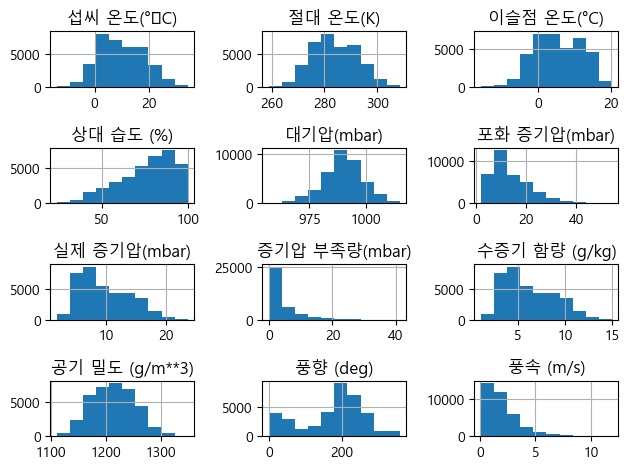

In [14]:
df.drop(['월', '일'], axis=1).hist()
plt.tight_layout();

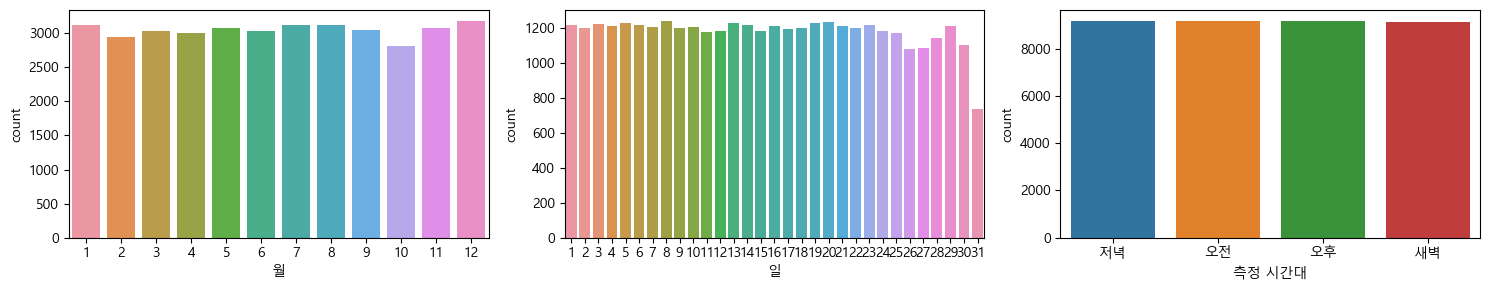

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
sns.countplot(data=df, x='월', ax=ax[0])
sns.countplot(data=df, x='일', ax=ax[1])
sns.countplot(data=df, x='측정 시간대', ax=ax[2])
plt.tight_layout();

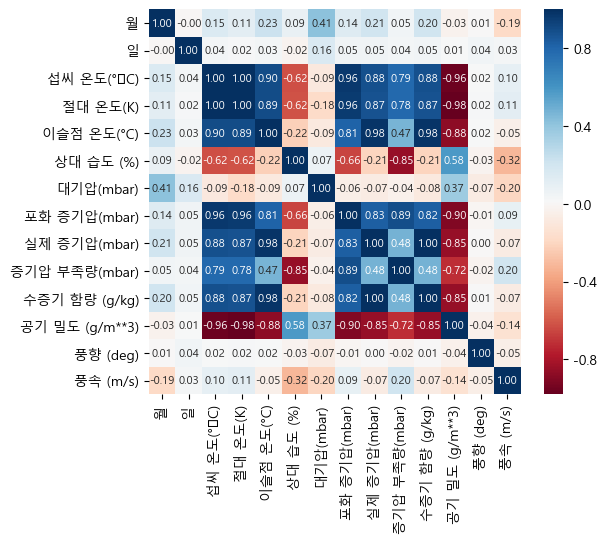

In [11]:
df_corr = df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(df_corr, annot=True, cmap='RdBu', fmt='.2f', annot_kws={'fontsize': 8});

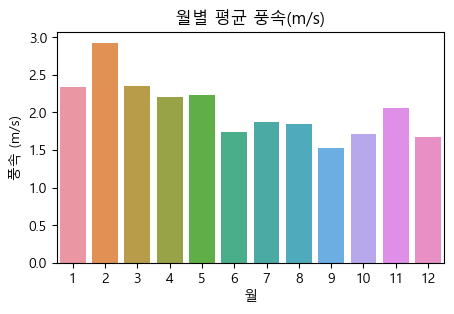

In [21]:
# 월별 평균 풍속
mon_wind = df[['월', '풍속 (m/s)']].groupby('월', as_index=False).mean()
plt.figure(figsize=(5,3))
sns.barplot(data=mon_wind, x='월', y='풍속 (m/s)')
plt.title('월별 평균 풍속(m/s)');

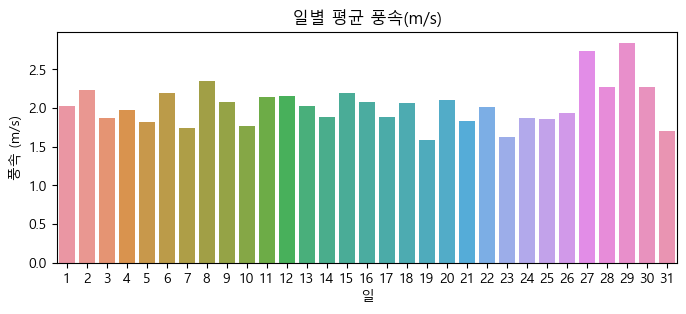

In [24]:
# 일별 평균 풍속
day_wind = df[['일', '풍속 (m/s)']].groupby('일', as_index=False).mean()
plt.figure(figsize=(8,3))
sns.barplot(data=day_wind, x='일', y='풍속 (m/s)')
plt.title('일별 평균 풍속(m/s)');

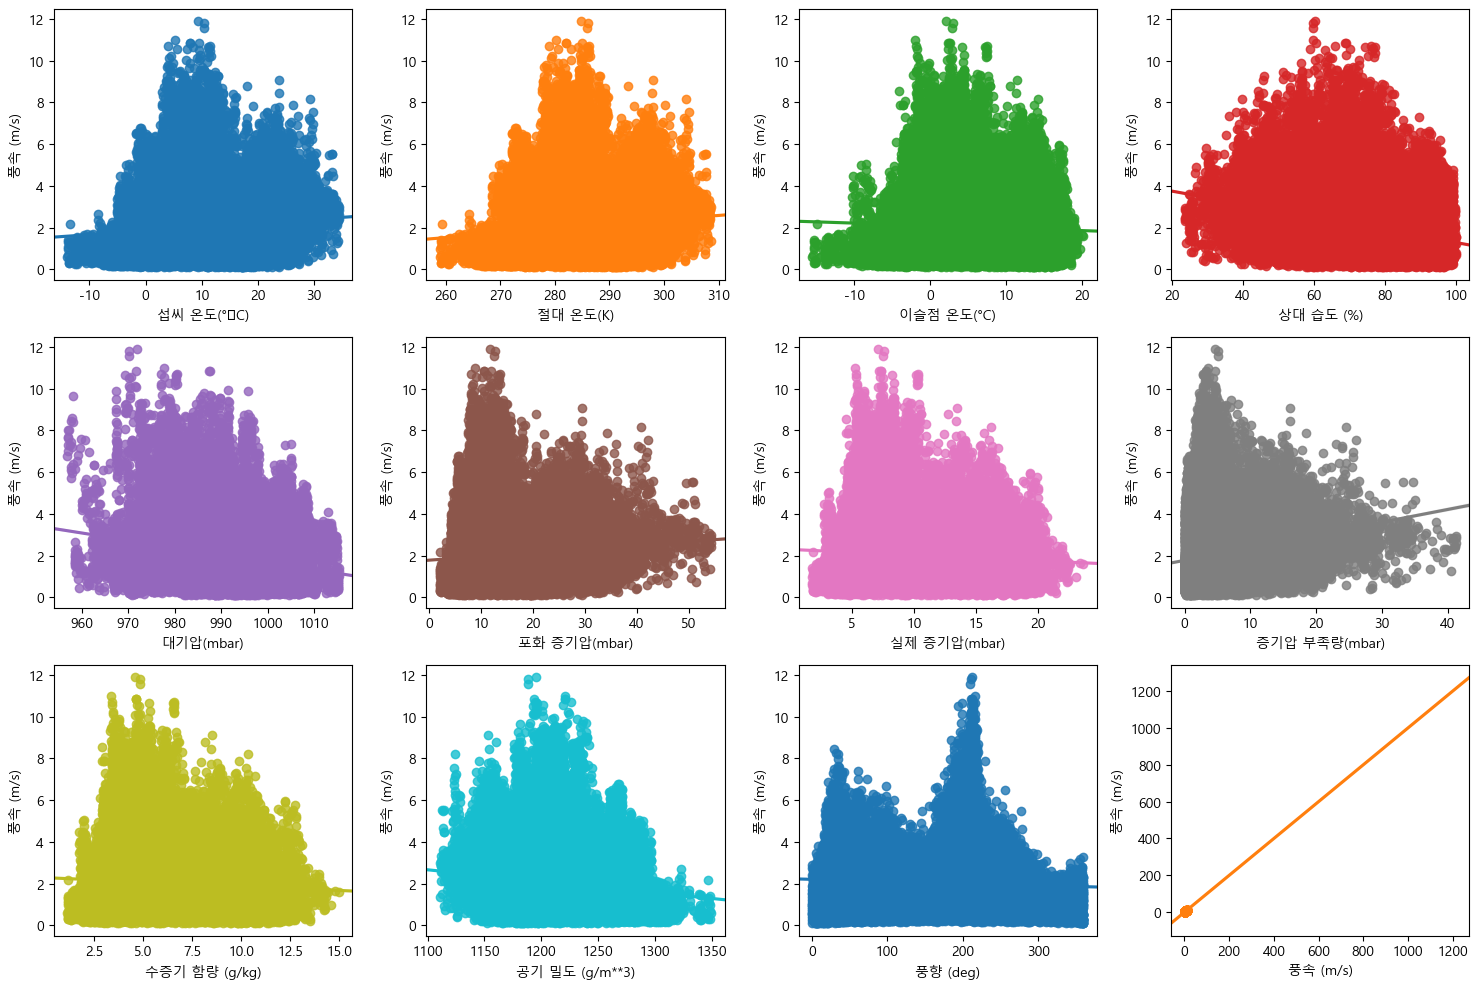

In [34]:
num_df = df.drop(['ID', '월', '일', '측정 시간대'], axis=1)
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
for i, feature in zip(range(12), num_df.columns):
    row = int(i/4)
    col = i%4
    
    if feature == '풍속 (m/s)': pass
plt.tight_layout();

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15,10))
for i, feature in zip(range(12), num_df.columns):
    row = int(i/4)
    col = i%4
    if feature == '이슬점 온도(°C)': pass
    else:
        sns.regplot(data=df, x=feature, y='이슬점 온도(°C)', ax=ax[row][col])
plt.tight_layout();